In [1]:
import os
import numpy as np
import mne
import osl
import yaml
import torch
from sklearn.manifold import TSNE
from scipy.io import loadmat, savemat
import pandas as pd
import seaborn as sns
import pickle
from cichy_data import CichyData
import wavenets_classifier
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

plt.rcParams['figure.figsize'] = [17, 12]

In [13]:
model = torch.load('cichy_data/all_wavenetlinear_semb10/model.pt', map_location=torch.device('cpu'))
parameters = [param.detach().numpy().flatten() for param in model.parameters()]

In [16]:
# exclude subject embeddings, should look at those separately
params = np.concatenate([p for i, p in enumerate(parameters) if i==16])

(-0.6, 0.6)

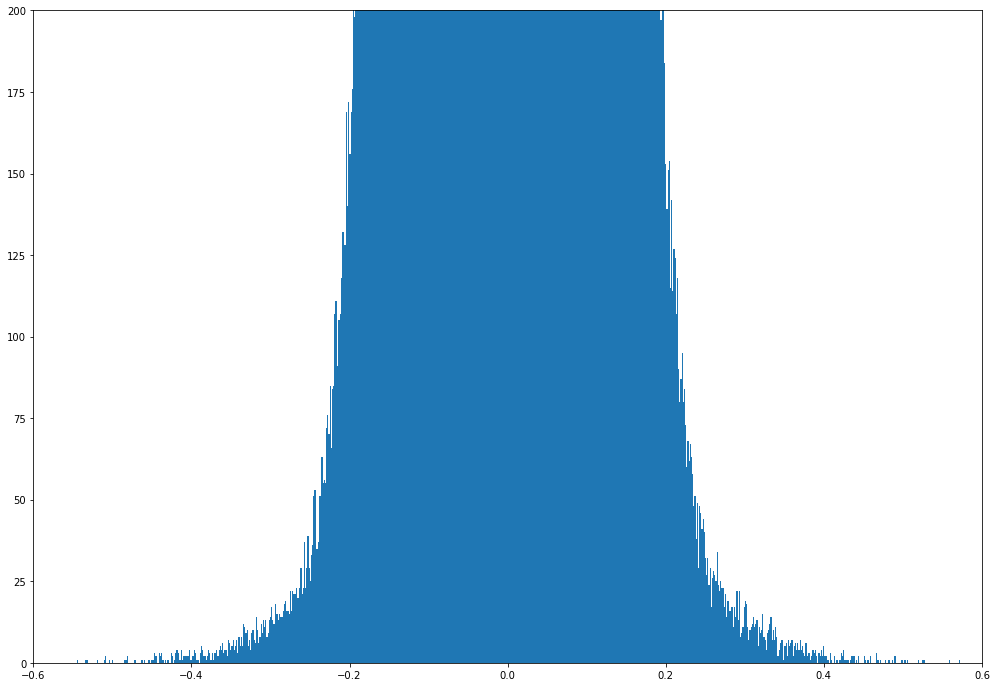

In [12]:
# nonlinear
bins = plt.hist(params, bins=1000)
plt.ylim(0, 200)
plt.xlim(-0.6, 0.6)

(0.0, 200.0)

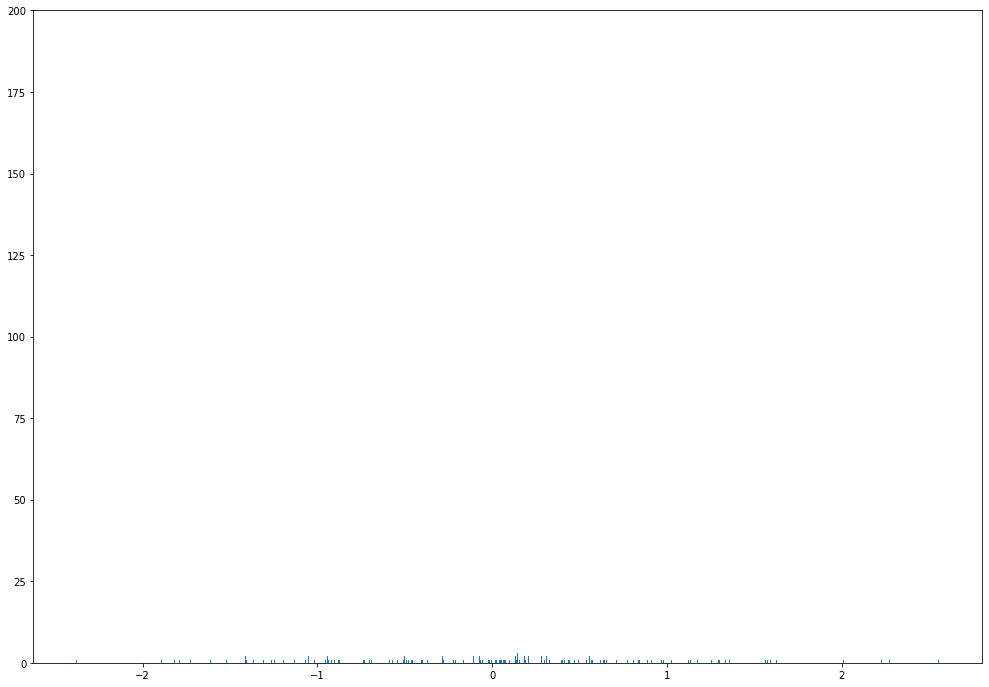

In [17]:
# linear
bins = plt.hist(params, bins=1000)
plt.ylim(0, 200)
#plt.xlim(-0.6, 0.6)

In [19]:
import random
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt

In [27]:
random.random()

0.29830028054497904

In [32]:
path = 'cichy_data/cond117/trial'
path2 = 'cichy_data/cond0118'

cont = []
epoched = []
for i in range(30):
    cont.append(np.load(path + str(i) + '.npy').T)

for f in os.listdir(path2):
    trial = loadmat(os.path.join(path2, f))
    epoched.append(trial['F'])

cont = np.array(cont)
epoched = np.array(epoched)

In [57]:
%matplotlib widget
plt.plot(epoched[0,0,:])
plt.plot(cont[24,0,:])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [28]:
epoched = np.mean(epoched, axis=(0,1))
cont = np.mean(cont, axis=(0,1))

In [29]:
np.linalg.norm(cont-epoched)

7.24268164660725e-18

In [31]:
%matplotlib widget
plt.plot(epoched)
plt.plot(cont+1e-14)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [23]:
%matplotlib widget
plt.plot(epoched.T)
a=0

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [24]:
%matplotlib widget
plt.plot(cont.T)
a=0

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [2]:
mat = np.random.random((4,4))

In [5]:
arr = np.triu(mat).reshape(-1)

In [6]:
arr[arr!=0]

array([0.18646651, 0.16935914, 0.42110396, 0.87089396, 0.98524091,
       0.5066439 , 0.38295525, 0.30939625, 0.4500072 , 0.91038434])